
# <center> Programa de Pós-Graduação em Modelagem Computacional e Sistemas (PPGMCS)</center>
# <center> Unimontes</center>
# <center> Introdução à Aprendizagem de Máquina</center>

# <center>Trabalho Prático 1</center>
# <center>Prof. Honovan Rocha - honovan.rocha@ufvjm.edu.br</center>

O objetivo deste trabalho é fazer com que o estudante consolide os conhecimentos vistos nas primeiras aulas da disciplina. Para obter os resultados desejados é importante trabalhar na implementação de todos os métodos vistos: Regressão Linear Simples, Regressão Linear com Múltiplas variáveis, Feature Scaling e Feature Engineering, Regressão Polinomial, Regressão Logística, Regularização e Seleção de Modelos.

Seguem os pacotes necessários às implementações:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline


## 1 - Regressão Linear Simples
Implemente o algoritmo para Regressão Linear para predizer o lucro para uma empresa de food truck. Essa empresa já possui diversas filiais e 
pretende iniciar uma pesquisa de mercado para abertura de novas unidades. Para obter um bom modelo preditivo serão utilizados dados relativos às franquias já existentes, estes dados contêm o lucro e a população das cidades.
O arquivo ex1data1.txt contém os dados que deverão ser utilizados. Cada linha do arquivo é uma cidade; a primeira coluna contem a população e a segunda o lucro, da cidade correspondente.

Visualização das primeiras linhas da base de dados:

In [3]:
# Carregando os dados
data = pd.read_csv('../datasets/ex1data1.txt', header=None, names=['População', 'Lucro'])

# Inicializando algumas variáveis
m = len(data) # Número de amostras de treinamento
X = np.append(np.ones((m, 1)), np.array(data["População"]).reshape((m,1)), axis=1) # Adicione x0, um vetor de 1's, em X.
y = np.array(data["Lucro"]).reshape(m, 1)

data.head()

,População,Lucro
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 1.1 - Plotando os Dados

Plotar os dados nos dá um idéia de como é a distribuição espacial dos dados:

Text(0, 0.5, 'Lucro em $10,000')

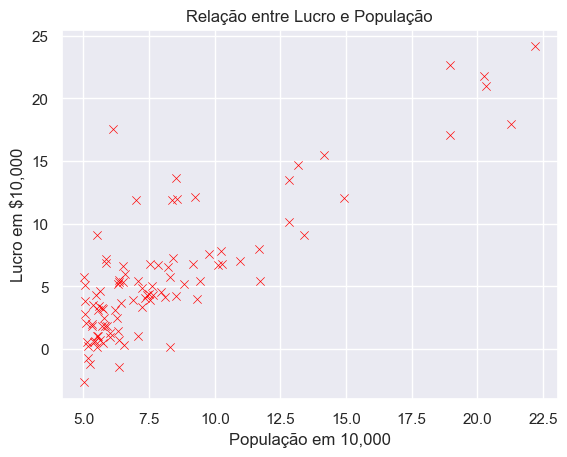

In [4]:

fig=sns.scatterplot(data, x="População", y="Lucro",marker="x",c="red")
fig.set_title("Relação entre Lucro e População")
fig.set_xlabel('População em 10,000')
fig.set_ylabel('Lucro em $10,000')


### 1.2 - Implementação do Gradiente Descendente

Nesta seção você deverá implementar a versão Batch do algoritmo Gradiente Descendente para encontrar os parâmetros $\vec{\theta}$ do modelo de regressão Linear: $y= h_\theta(x)= \theta_0 + \theta_1x$. Inicialilze $\vec{\theta}$ com valores zero e defina a taxa de aprendizado $\alpha=0.01$. Em seguida, implemente o código faltante para a função de custo $$J(\theta) = \frac{1}{2m} \displaystyle\sum_{i = 0}^{m}(h_θ(x^{(i)}) - y^{(i)})^2$$ completando o código a seguir:

In [5]:
def cost_function(X, y, theta):
    """ Implemente a função de custo para um dado vetor de parâmetros para ajustar a regressão linear aos dados em X e y. """
    """X é a matriz contendo todas as amostras da base de dados exceto o valor de y"""
    """É aconselhável usar vetorização na sua implementação"""
    m = len(y)  # número de exemplos de treinamento

    # Calcula a predição
    y_predito = np.dot(X, theta)

    # Calcula o custo usando vetorização
    diferenca = y_predito - y
    custo = np.sum(np.square(diferenca)) / (2 * m)  # Cálculo do erro quadrático médio

    
    return custo


Ao testar esta função como o vetor $\vec{\theta} = \begin{bmatrix}0 & 0\end{bmatrix}$, $J(\theta)$ deve retornar um valor de aproximadamente  32.07.

In [6]:
initial_theta = np.zeros((2,1))
print(cost_function(X, y, initial_theta))

32.072733877455676


Após testar a função "cost_function" e garantir que ela está funcionando corretamente, você deve implementar o algoritmo do Gradiente Descendente, cuja definição formal é: $repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}$

Para implementá-lo, complete a função a seguir:

In [7]:
def gradient_descent(X, y, theta, alpha, iterations):
    """ Implemente aqui o gradiente descendente para aprender o vetor theta. 
    Retorne o valor encontrado para theta e os valores da função de custo para cada iteração(J_history).
    """
    m = len(y)  # número de exemplos de treinamento
    custo_historico = np.zeros(iterations)  # para armazenar o histórico de custo durante as iterações

    for iteracao in range(iterations):
        # Calcula as predições
        y_predito = np.dot(X, theta)

        # Calcula o erro
        erro = y_predito - y

        # Atualiza os parâmetros do modelo
        theta = theta - (alpha / m) * np.dot(X.T, erro)

        # Calcula o custo e armazena no histórico
        custo_historico[iteracao] = cost_function(X, y, theta)
    

    

    return theta, custo_historico

Após a convergência, o Gradiente Descendente deve produzir aproximadamente o seguinte vetor de parâmetros: $\vec{\theta} = \begin{bmatrix}-3.6303\\1.1664\end{bmatrix}$

Agora, altere os parâmetros do Algoritmo para analisar o seu comportamento, e verifique as mudanças na curva do erro ($J(\theta)$ a cada iteração) e no vetor $\vec{\theta}$. Exemplo de alterações:

In [8]:
alpha = 0.01
iterations = 2000

theta, J_history = gradient_descent(X, y, initial_theta, alpha, iterations)
theta

array([[-3.78806857],
       [ 1.18221277]])

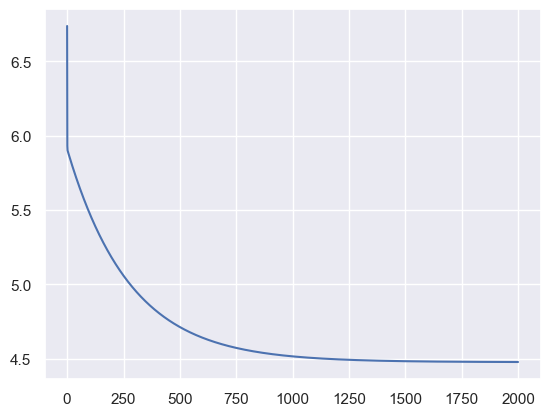

In [9]:
#Verificando a curva de erro a cada iteração
plt.plot(J_history)

In [10]:
alphas = [0.01,0.009,0.015,0.02,0.021]
iteracoes=2000
historicos_custo=[]
thetas=[]
df_resultado=pd.DataFrame({"alpha":[],"custo":[],"iteracao":[]})
for alpha in alphas:
    theta, J_history = gradient_descent(X, y, initial_theta, alpha, iteracoes)
    historicos_custo.append(J_history)
    thetas.append(theta)
    df=pd.DataFrame({"alpha":str(alpha),"custo":J_history,"iteracao":range(1,iteracoes+1)})
    df_resultado = pd.concat([df_resultado,df])



<Axes: xlabel='iteracao', ylabel='custo'>

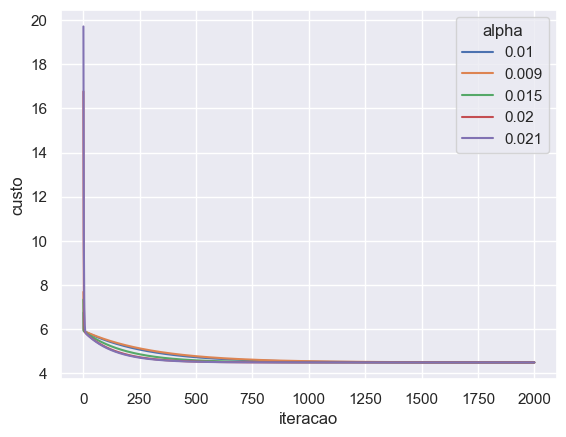

In [11]:

sns.lineplot(data=df_resultado, x="iteracao", y="custo", hue="alpha",markers=True)

In [12]:
df_resultado.pivot(index="iteracao",columns="alpha", values="custo").head(100)

alpha,0.009,0.01,0.015,0.02,0.021
iteracao,,,,,
1.0,7.679185,6.737190,7.332417,16.769642,19.718127
2.0,6.026014,5.931594,5.977886,10.407580,13.188746
3.0,5.909950,5.901155,5.896859,7.759183,9.735641
4.0,5.897799,5.895229,5.885220,6.653288,7.907121
5.0,5.892685,5.890095,5.877399,6.188106,6.936565
...,...,...,...,...,...
96.0,5.530455,5.494558,5.332525,5.196180,5.171625
97.0,5.527040,5.490892,5.327905,5.191004,5.166376
98.0,5.523635,5.487240,5.323309,5.185865,5.161167


Verifique a reta obtida após o aprendizado dos parâmetros, utilizando o script a seguir:

<Axes: xlabel='populacao', ylabel='lucro'>

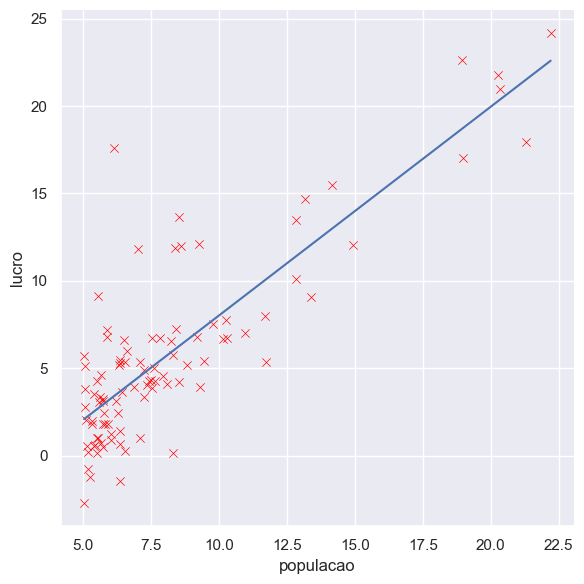

In [13]:
df=pd.DataFrame({"populacao":X[:,1],"lucro":y.flatten()})
df2=pd.DataFrame({"populacao":X[:,1],"lucro":X.dot(theta).flatten()})

g= sns.FacetGrid(df, height = 6)
g.map(sns.scatterplot,"populacao","lucro",marker="x",color="red")
sns.lineplot(df2,x="populacao",y="lucro")


Para finalizar esta parte do trabalho, faça uma predição usando o modelo aprendido pelo algoritmo. Considere 2 cidades com populações de 35000 e 100000 habitantes respectivamente, qual o lucro predito para estas cidades????

In [14]:
#Faça aqui o código para predição do lucro nas 2 novas cidades
#...

populacoes=[35000, 100000, 25800,90000,45756]
new_X = np.array([[1,p] for p in populacoes])
new_y = new_X.dot(theta)

df = pd.DataFrame({"populacao":populacoes,"lucro":new_y.flatten()})
df.round(2)

,populacao,lucro
0,35000,41745.18
1,100000,119279.19
2,25800,30771.14
3,90000,107350.88
4,45756,54575.27


Text(0.5, 1.0, 'Previsão de Lucro para novas cidades')

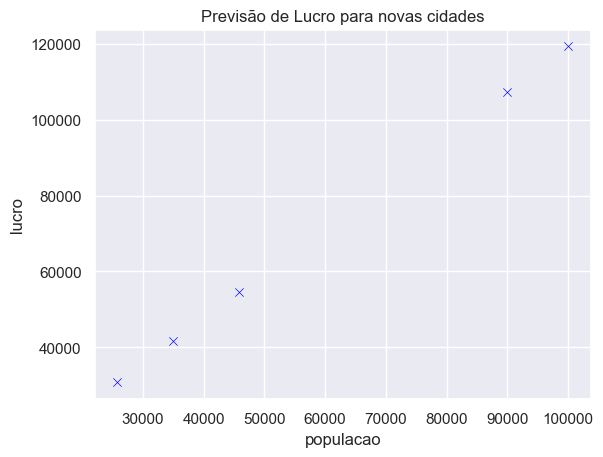

In [15]:
ax = sns.scatterplot(df,x="populacao",y="lucro",marker="x",color="blue")
ax.set_title("Previsão de Lucro para novas cidades")

## 2 - Regressão Linear Múltipla

Nesta seção do trabalho voçê deverá implementar um algoritmo para Regressão Linear com Múltiplas Variáveis para predição do preço de venda de imóveis. O arquivo ex1data2.txt contém as informações dos imóveis. A coluna 1 corresponde ao tamanho do imóvel (em pés quadrados), na coluna 2 está a quantidade de quartos do imóvel, e a terceira coluna corresponde ao preço do imóvel.

Obs: 1 pé corresponde a 0.3048 metros.

O código a seguir mostra as primeiras linhas do arquivo ex1data2.txt:

In [16]:
# Carregando os dados para a variável (data)
data = pd.read_csv("../datasets/ex1data2.txt", header = None, names=["Size", "Bedrooms","Price"])
m = len(data)

# Inicializando X, y e o vetor de parâmetros (theta)
x0 = np.ones(m)
size = np.array((data["Size"]))
bedrooms = np.array((data["Bedrooms"]))
X = np.array([x0, size, bedrooms]).T
y = np.array(data["Price"]).reshape(len(data.index), 1)
theta_init = np.zeros((3,1))

data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.1 Normalização das Features

Quando as features tem grandes diferenças com relação à ordem de magnitude, algumas delas podem ter maior influência na direção de busca do gradiente, dominando o processo de busca em determinadas direções. Analisando-se a base de dados, podemos verificar que a coluna relativa ao tamanho dos imóveis tem valores aproximadamente 1000 vezes maiores que os valores da coluna que contém a quantidade de quartos. Desta forma, para aumentar a velocidade de convergência do algoritmo Gradiente Descendente, implemente a normalização das features (Feature Scaling) atualizando o valor de cada coluna de dados usando a seguinte formula: $x := \frac{x - \mu}{\sigma}$, onde $\mu$ é a média e $\sigma$ é o desvio padrão. Complete a função a seguir para realizar a normalização. A função recebe a matriz de dados X como parâmetro e retorna o valor atualizado de X e os valores calculados de $\mu$ e $\sigma$.


In [17]:
# Função para realização da normalização
def normalize(X):
    """ Normaliza as features em X Retorna a versão normalizada de X onde a média de
    cada feature é zero e o desvio padrão é 1. Lembre-se que cada linha de X tem as features de um determinado imóvel
    e cada coluna de X contém uma feature específica (ex: qtde quartos) para todos os imóveis.
    """
    mu = np.mean(X[:,1:],axis=0)
    sigma = np.std(X[:,1:],axis=0)
        
    """Faça aqui os passos necessários para a normalização ..."""

    X_normalizado = X.copy()
    X_normalizado[:,1:]=(X[:,1:]-mu)/sigma
    
    return X_normalizado, mu, sigma



In [18]:
X, mu, sigma = normalize(X)
X[:,:5]

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

### Observação importante sobre a normalização:
É importante armazenar os valores de $\mu$ e $\sigma$ calculados para cada variável, pois quando for testar o modelo aprendido para prever o valor de um novo imóvel, você deverá usar os valores armazenados (obtidos através dos dados de treinamento) para normalizar as features deste novo imóvel, antes de testar o modelo sobre o novo dado [area, qtde_quartos].

### 2.2 - Gradiente Descendente

Implemente o algoritmo Gradiente Descendente para realizar a regressão com múltiplas variáveis. Garanta que sua implementação seja na forma vetorial e genérica (suportando qualquer quantidade de features). Tome a função a seguir como base para sua implementação:

In [19]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    J_history = np.zeros(iterations)
    """Faça aqui os passos necessários..."""
    m=len(y)
    for i in range(iterations):
        y_predito=np.dot(X,theta)
        erro=y_predito-y

        theta = theta - (alpha/m)*np.dot(X.T,erro)
        J_history[i] = cost_function(X,y,theta)

    return theta, J_history


In [20]:
#Testando o algoritmo
alpha = 0.01
iterations = 2000
initial_theta = np.zeros((3,1))
theta, J_history = gradient_descent_multi(X, y, initial_theta, alpha, iterations)
theta

array([[340412.65894002],
       [109439.22578243],
       [ -6569.78416695]])

Analise a curva de erro para cada iteração do algoritmo, gerando um gráfico similar àquele obtido para regressão linear simples

Text(0, 0.5, 'Custo')

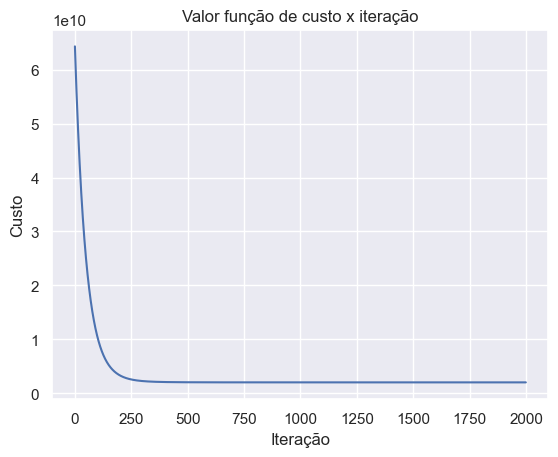

In [21]:
ax = sns.lineplot(J_history)
ax.set_title("Valor função de custo x iteração")
ax.set_xlabel("Iteração")
ax.set_ylabel("Custo")

Para finalizar esta parte do trabalho, faça uma predição usando o modelo aprendido pelo algoritmo. Considere 1 imóvel com 1650 pés quadrados e 3 quartos. Qual o preço predito para este imóvel?

In [30]:
mu,sigma,theta

(array([2000.68085106,    3.17021277]),
 array([7.86202619e+02, 7.52842809e-01]),
 array([[340412.65894002],
        [109439.22578243],
        [ -6569.78416695]]))

In [39]:
#Faça a predição aqui...
imoveis=[[1650,3],[200,2],[3000,5],[6000,8]]
new_X = np.array(imoveis)

X_normalizado = (new_X-mu)/sigma

#incluir bias na primeira coluna
X_normalizado = np.c_[np.ones((X_normalizado.shape[0], 1)), X_normalizado]
y_predito = np.dot(X_normalizado, theta)

y_predito.flatten().round(2)

array([293083.35,  99970.31, 463549.77, 854969.19])

## 3 - Regressão Logística

O objetivo da Regressão Logística é predizer a que categoria(classe) uma certa amostra pertence. Considerando-se classificação binária, existem apenas 2 possíveis classes: $y \in \{0,1\}$.

Nesta Seção, com o objetivo de fixar o conteúdo, você deverá implementar o algoritmo de Regressão Logística e aplicá-lo a uma base de dados para predição de aprovação de um estudante com base nos resultados de 2 avaliações realizadas por ele. A base de dados(arquivo ex2data1.txt) contem dados históricos referentes a avaliações passadas, onde as colunas da base são: Avaliação 1, Avaliação 2 e resultado(aprovado ou reprovado).

### 3.1 - Visualização da Base de Dados

O código a seguir mostra as primeiras linhas do arquivo ex2data1.txt:

In [ ]:
# Carregando os dados para a variável "data"
data = pd.read_csv("ex2data1.txt", header = None, names = ["Avaliacao 1", "Avaliacao 2", "Aprovado"])

# Inicializando Variáveis
m = len(data["Aprovado"])
x0 = np.ones(m)
avaliacao_1 = np.array((data["Avaliacao 1"]))
avaliacao_2 = np.array((data["Avaliacao 2"]))
X = np.array([x0, avaliacao_1, avaliacao_2]).T
y = np.array(data["Aprovado"]).reshape((m,1))
m, n = X.shape

print("Matriz X:\n",X[:5])
print("\n\nDados brutos: ")
data.head()

Plotando os dados - As cores diferenciam aprovados e reprovados:

In [ ]:
# Encontrando os indíces das classes positiva(Aprovado) e negativa(reprovado)
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plotando as amostras
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Aprovado')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Reprovado')
plt.legend()
plt.show()

### 3.2 - Implementação do Algoritmo de Aprendizado

A primeira etapa para implementação do algoritmo para regressão logística é a definição da função sigmoid. Ao utilizar esta função, a hipótese passa a ter a seguinte forma: $h_\theta(x) = g(z) = g(\theta^Tx) = \frac{1}{1+ e^{-z}} = \frac{1}{1+ e^{-\theta^Tx}}$.

In [ ]:
sigmoid = lambda z: 1/(1+np.exp(-z))

def plot_sigmoid():
  plt.grid()
  plt.xlim([-10.0, 10.0])
  plt.ylim([-0.1, 1.1])
  x = np.arange(-10, 10, 0.001)
  plt.xlabel(r'$z = \theta^Tx$', size=10)
  plt.ylabel('$g(z)$', size=10)
  plt.title('Função Sigmoid', size=10)
  plt.plot(x, sigmoid(x), label=r'$g(z)= \frac{1}{1+e^{-z}}$')
  plt.legend(loc='lower right', fontsize=15)

plot_sigmoid()

Teste a função sigmóide antes de partir para a implementação da função de custo e do gradiente. Ela deve retornar $\frac{1}{2}$ caso você passe o valor $0$ como parâmetro, retornar $1$ caso você passe um valor grande positivo e retornar $0$ caso você passe um valor grande e negativo. 

In [ ]:
print('g(0.0) = %.3f' % sigmoid(0.0))
"""...Teste com outros valores..."""

Implemente agora a função de custo para regressão logística. Lembre-se que ela tem um formato diferente da regressão linear: $$J(\theta) = - \begin{bmatrix}\frac{1}{m}\displaystyle\sum_{i=1}^{m}-y^{(i)}\log h(x^{(i)}-(1-y^{(i)})\log(1-h_\theta(x^{(i)}))\end{bmatrix}$$

Implemente a função de custo utilizando vetorização: $$J(\theta) = \frac{1}{m} ⋅(−y^T \log(h)−(1−y)^T \log(1−h))$$

Você pode definir a função de custo completando a função abaixo:

In [ ]:
def compute_cost(theta, X, y):
    """Implementação..."""
    return 0

Agora, você deve implementar um função para calcular o vetor gradiente $\nabla(\theta)$, contendo as derivadas parciais da função de custo com relação a cada parâmetro $\frac{\delta}{\delta\theta_J}$:
$$\frac{\delta}{\delta\theta_J} = \frac{1}{m}\displaystyle\sum_{i = 1}^{m} \begin{bmatrix}(h_\theta(x^{(i)}) - y^{(i)}\end{bmatrix}x_j^{(i)}$$
Perceba que esta é uma etapa interemediária que utilizamos para implementar o algoritmo do Gradiente Descendente. Entretanto, desta vez é importante implementar esta função intermediária de forma genérica, uma vez que o vetor $\nabla(\theta)$ pode ser utilizado em outros algoritmos de aprendizado baseados em direção de busca. Complete a função a seguir para computar o vetor gradiente:

In [ ]:
def compute_gradient(theta, X, y):
    grad = np.zeros(len(theta))
    return grad

Teste a função de custo e o gradiente. Inicializando $\vec{\theta}$ com zeros, você deve obter $J(\theta) \approx 0.693$ e $\frac{\delta}{\delta\theta_J} \approx \begin{bmatrix}-0.1000 & -12.0092 & -11.2628 \end{bmatrix}$

In [ ]:
initial_theta = np.zeros(n)
print('Cost: \n{}\n'.format(compute_cost(initial_theta, X, y)))
print('Gradient: \n{}'.format(compute_gradient(initial_theta, X, y)))


Diferente de como fizemos nas partes iniciais deste trabalho, onde usamos o algoritmo Gradiente Descendente para aprender os parâmetros $\vec{\theta}$, utilizaremos agora um outro algoritmo de aprendizado, o Gradiente Conjugado. A implementação deste algoritmo não é escopo deste trabalho, caso tenha interesse em estudar mais sobre ele, pode pesquisar  [aqui](https://en.wikipedia.org/wiki/Conjugate_gradient_method). Para utilizá-lo, vamos precisar da biblioteca de otimização scipy.optimize, que fornece a função minimize para realizarmos o processo de minimização de $J(\theta)$. Para utilizá-la temos que fornecer nossa função de custo (compute_cost), nossa função para obtenção de $\nabla(\theta)$(compute_gradient), e os valores iniciais de $\vec(\theta)$.

Antes de utilizar o algoritmo, leia a documentação da função ([minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)) e faça um pequeno resumo(cerca 10 linhas) sobre o funcionamento e principais parâmetros permitidos na função. 

#### Resuma a função minimize aqui ...

In [ ]:
from scipy.optimize import minimize
result = minimize(compute_cost, initial_theta, args = (X, y),
                   method = 'CG', jac = compute_gradient, 
                   options = {"maxiter": 400, "disp" : 1})
theta = result.x
print('O gradiente Conjugado encontrou os seguintes valores para theta: {}'.format(theta))

### 3.3 - Superfície de Decisão

A superfície de decisão será uma reta no caso desta base bidimensional, que separa as áreas onde o valor predito é y=1 e y=0.

In [ ]:
# Encontra os indíces de amostras positivas e negativas
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plota as amostras
plt.scatter(X[pos, 1], X[pos, 2], c='blue', marker='+', label='Aprovado')
plt.scatter(X[neg, 1], X[neg, 2], c='yellow', marker='o', label='Reprovado')
plt.legend()

#Não use este vetor theta a seguir
#Este é o vetor ótimo que a sua implementação deve encontrar
#theta = np.array([-25.15522426,0.20618292,0.20142209])

# Plota a fronteira de decisão
plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
plot_y = (-1./theta[2]) * ((theta[1] * (plot_x) + theta[0]))

plt.plot(plot_x, plot_y, label='Fronteira de Decisão')

# Legend, specific for the exercise
plt.legend()

Após visualizar a fronteira de decisão, teste uma nova entrada para avaliar a probabilidade do candidato ser aprovado. Considerando-se um candidato com notas próximas de 45 e 85, na primeira e segunda avaliação, respectivamente, a probabiliade deve estar próxima de 0.8.

In [ ]:
#Faça a predição aqui...

Agora, para predizer a quantidade de acertos que o seu modelo aprendido está obtendo nos dados de treinamento, complete a implementação das funções "predict" e "accuracy". A função "predict" retorna $1$(Aprovado) ou $0$(Reprovado) para todas as amostras da base de dados, enquanto a função "accuracy" utiliza a função "predict" para contabilizar a quantidade de acertos. Para este nosso conjunto de dados, é esperado que o modelo tenha cerca de 89% de acerto. 

Observe que em uma aplicação real, deveriamos considerar dividir a base de dados em dois conjuntos (treinamento e teste), onde o modelo deveria ser avaliado em dados que não foram vistos por ele durante o processo de treinamento.

In [ ]:
def predict(X, theta):
    predicts = np.zeros(X.shape[0])
    """Implemente aqui..."""
    return predicts

def accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acertos = 0
    """Implemente aqui"""
    return acertos

In [ ]:
#Teste as funções...

## 4 - Regularização

Regularização é um dos possíveis mecanismos que utilizamos para evitar o problema de overfitting. Lembrando que overfitting quer dizer que nosso modelo se ajustou de mais aos nossos dados de treinamento e aprendendo inclusive o ruído inerente ao processo de amostragem. Por outro lado, se utilizarmos a regularização de maneira incorreta podemos ter o problema de underfitting, que é gerado quando nosso modelo tem capacidade suficiente de aproximar os dados, devido a um treinamento ineficiente, poucos parâmetros ou mapeamento de features feito de forma incorreta.

O problema a ser resolvido agora consiste na predição de se os microchips de uma usina de fabricação passam na garantia de qualidade (QA). Durante o processo de QA, cada microchip passa por vários testes visando assegurar o correto funcionamento.
A base de dados que utilizaremos consiste no resultado de 2 testes realizados, e os correspondentes resultados, para alguns microchips. Desta forma, construiremos um modelo de regressão logística regularizado para predizer se novos microchips devem ser aceitos ou não. Os dados estão no arquivo "ex2data2.txt" e trecho de código a seguir mostra as primeiras linhas do arquivo.

In [ ]:
# Carregando os dados
data = pd.read_csv("ex2data2.txt", header = None, 
                   names = ["Teste 1", "Teste 2", "Status"])

# Inicializando variáveis
m = len(data["Status"])
test_1 = np.array((data["Teste 1"]))
test_2 = np.array((data["Teste 2"]))
X = np.array([test_1, test_2]).T # a coluna com valores 1 ainda não será adicionada aqui.
y = np.array(data["Status"])

print("\n\nDados: ")
data.head()

### 4.1 - Visualização dos Dados

O trecho de código a seguir produz uma visualização da base de dados de Microchips:

In [ ]:
# Encontrando os indíces das amostras positivas e negativas
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plotando as amostras
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='red', label='Aceito')
plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='blue', label='rejeitado')
plt.xlabel('Teste 1')
plt.ylabel('Teste 2')
plt.legend()
plt.show()


### 4.2 - Mapeamento de Atributos (Feature Mapping)

Uma forma de obtermos uma curva não linear para os dados originais, utilizando o ferramental de regressão linear, é criando mais features a partir das já existentes. Para isso, implemente a função "map_feature" que recebe a base de dados com as features originais e retorna uma nova base de dados, com o mapeamento das features para todos os termos polinomiais de $x_1$ e $x_2$ até uma potência pré-estabelecida (ex: grau 6).
$$Map\_Features(X)= \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_1x_2 \\ x_1^2 \\ x_2^2 \\ x_1^3 \\ \vdots \\ x_1x_2^5 \\ x_2^6 \end{bmatrix}$$

Considerando-se o exemplo com grau 6, cada amostra de treinamento que correspondia a um vetor de 2 atributos, será transformado em um vetor com 28 atributos. Desta maneira, o nosso modelo de regressão logística aprendido a partir deste novo vetor de atributos com maior dimensão, terá uma fronteira de decisão de maior complexidade, parecendo não-linear quando plotada no gráfico bidimensional relativo aos atributos originais da base.

Este recurso nos permite construir um classificador mais eficiente para o ajuste de regiões complexas, entretanto, ele também está mais inclinado ao problema de overfitting.

In [ ]:
def map_feature(X1, X2, degree):
    """Implemente aqui..."""
    pass

### 4.3 - Função de custo e gradiente

Recapitulando, regularização é realizada a partir da penalização de $\vec{\theta}$, com o objetivo de reduzir a magnitude dos parâmetros. Para isto, adicionamos um termos de regularização $\frac{\lambda}{m}\displaystyle\sum_{j=1}^{n}{\theta_j}^2$ onde $\lambda$ é o parâmetro de regularização. Para obtenção de um modelo de complexidade equivalente ao problema de aprendizado, é necessário encontrar o valor ideal de $\lambda$, uma vez que $\lambda=0$ elimina a regularização enquanto um valor muito grande para $\lambda$ penaliza excessivamente $\vec{\theta}$ gerando um modelo com underfitting. A função de custo para regressão logística com regularização tem a seguinte forma:
$$J(\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}-\begin{bmatrix}y^{(i)}\log h(x^{(i)}+(1-y^{(i)}\log(1-h_\theta(x^{(i)})) \end{bmatrix} + \frac{\lambda}{m}\displaystyle\sum_{j=1}^{n}{\theta_j}^2$$

Implemente a função de custo regularizada:

In [ ]:
def compute_regularized_cost(X, y, theta, _lambda):
    """Implemente aqui..."""
    #regularization = ?
    #cost = ?
    #return cost + regularization
    pass

O gradiente para a função regularizada também é modificado, sendo definido da seguinte forma:

$$\theta_0 = \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(\vec{x}^{(i)}) - y^{(i)})x_0^{(i)}) \qquad j =0\\
\theta_j = \theta_j - \alpha \left[\left(\frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(\vec{x}^{(i)}) - y^{(i)})x_j^{(i)}\right) + \frac{\lambda}{m}\theta_j\right] \qquad j \in \{1, 2, \dots, n\}
$$

Observe que $\theta_0$ não é penalizado.

Agora, implemente a função "compute_regularized_gradient" e teste com os parâmetros iniciais iguais a zero. Faça testes utilizando diferentes valores para $\lambda$. Ex: $\lambda=0, \lambda=1, \lambda=100$. Para $\lambda=1$ a função de custo deve retornar um valor de aproximadamente $0.693$.

In [ ]:
def compute_regularized_gradient(X, y, theta, _lambda):
    return np.zeros(len(theta))

In [ ]:
#Testa a função aqui para alguns valores de _lambda

Utilizando as funções que você criou (compute_regularized_cost e compute_regularized_gradient) utilize a função minimize do pacote scipy.optimize para encontrar os valores ótimos de $\vec{\theta}$.

In [ ]:
from scipy.optimize import minimize
#result = minimize(...

### 4.4 - Visualizando a Fronteira de Decisão

Aqui, você deve plotar a superfície de decisão. Procure informações a respeito da função "contour" para ter auxílio nao plotagem da superfície.

In [ ]:
#Implemente aqui o plot da fronteira de decisão...

A sua implementação deve plotar um gráfico semelhante ao apresentado a seguir:

 ![](fig_logistic_regularization.png)

Agora que já é possível visualizar uma fronteira de separação para o problema, divida os dados em 2 partes (treinamento e teste) e realize o treinamento mais 10 vezes, alterando o valor de $\lambda$ e plotando a fronteira de decisão obtida a cada valor testado. Aponte situações onde ocorrer underfitting e overfitting, além de mostrar qual valor de $\lambda$ proporcionou o resultado com maior acurácia para os dados de teste. Lembre-se, o seu modelo será obtido através da aplicação do algoritmo de aprendizado apenas aos dados de treinamento. Os dados de teste serão utilizados apenas para verificar o desempenho do modelo obtido para um determinado valor de $\lambda$.

In [ ]:
#Realize aqui os testes...

O gráfico a seguir foi obtido utilizando-se $\lambda = 0.0001$:

![](fig_logistic_regularization_overfitting.png)

## 5 - O que deve ser entregue

Você deve entregar através do sistema, este notebook totalmente preenchido com o que se pede em cada item onde uma implementação é necessária. Caso esteja utilizando algum código ou imagem anexado ao notebook, envie junto, em um arquivo .zip.

Adicionalmente, faça um relatório de 1 página(anexe ao .zip) para apresentar suas análises e conclusões sobre as diversas seções deste trabalho.

## 6 - Créditos

Este trabalho é uma tradução/adaptação de parte dos trabalhos práticos do curso Stanford CS229 - Machine Learning, de autoria do prof. Andrew Ng.